# Importing Libraries

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

# Analysing Data

In [25]:
df=pd.read_csv('data.csv')

In [27]:
df.shape

(372450, 785)

In [28]:
data_array = np.array(df,dtype=np.uint8)
del df  #memory issues

In [30]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
alpha_min = list('abcdefghijklmnopqrstuvwxyz')

In [19]:
img_size=28
data=[]
target=[]
i=-1
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    i += 1
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
            #Coverting the image into gray scale
            resized=cv2.resize(thresh ,(img_size,img_size))
            #resizing the gray scale into 64x64, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(i)
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [17]:
labels = data_array[:,0]
x = data_array[:,1:].reshape(372450,28,28)/255.
del data_array
unique, counts = np.unique(labels, return_counts=True)
list_alpha = list(zip(alpha, counts))
for i in list_alpha:
    print(i[0],' : ',i[1])

A  :  13869
B  :  8668
C  :  23409
D  :  10134
E  :  11440
F  :  1163
G  :  5762
H  :  7218
I  :  1120
J  :  8493
K  :  5603
L  :  11586
M  :  12336
N  :  19010
O  :  57825
P  :  19341
Q  :  5812
R  :  11566
S  :  48419
T  :  22495
U  :  29008
V  :  4182
W  :  10784
X  :  6272
Y  :  10859
Z  :  6076


In [49]:
x.shape

(372450, 28, 28)

<BarContainer object of 26 artists>

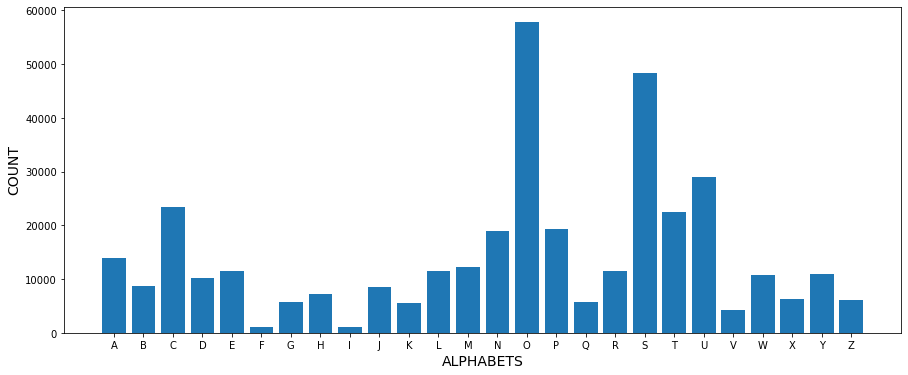

In [8]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('ALPHABETS',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.bar(alpha,counts)

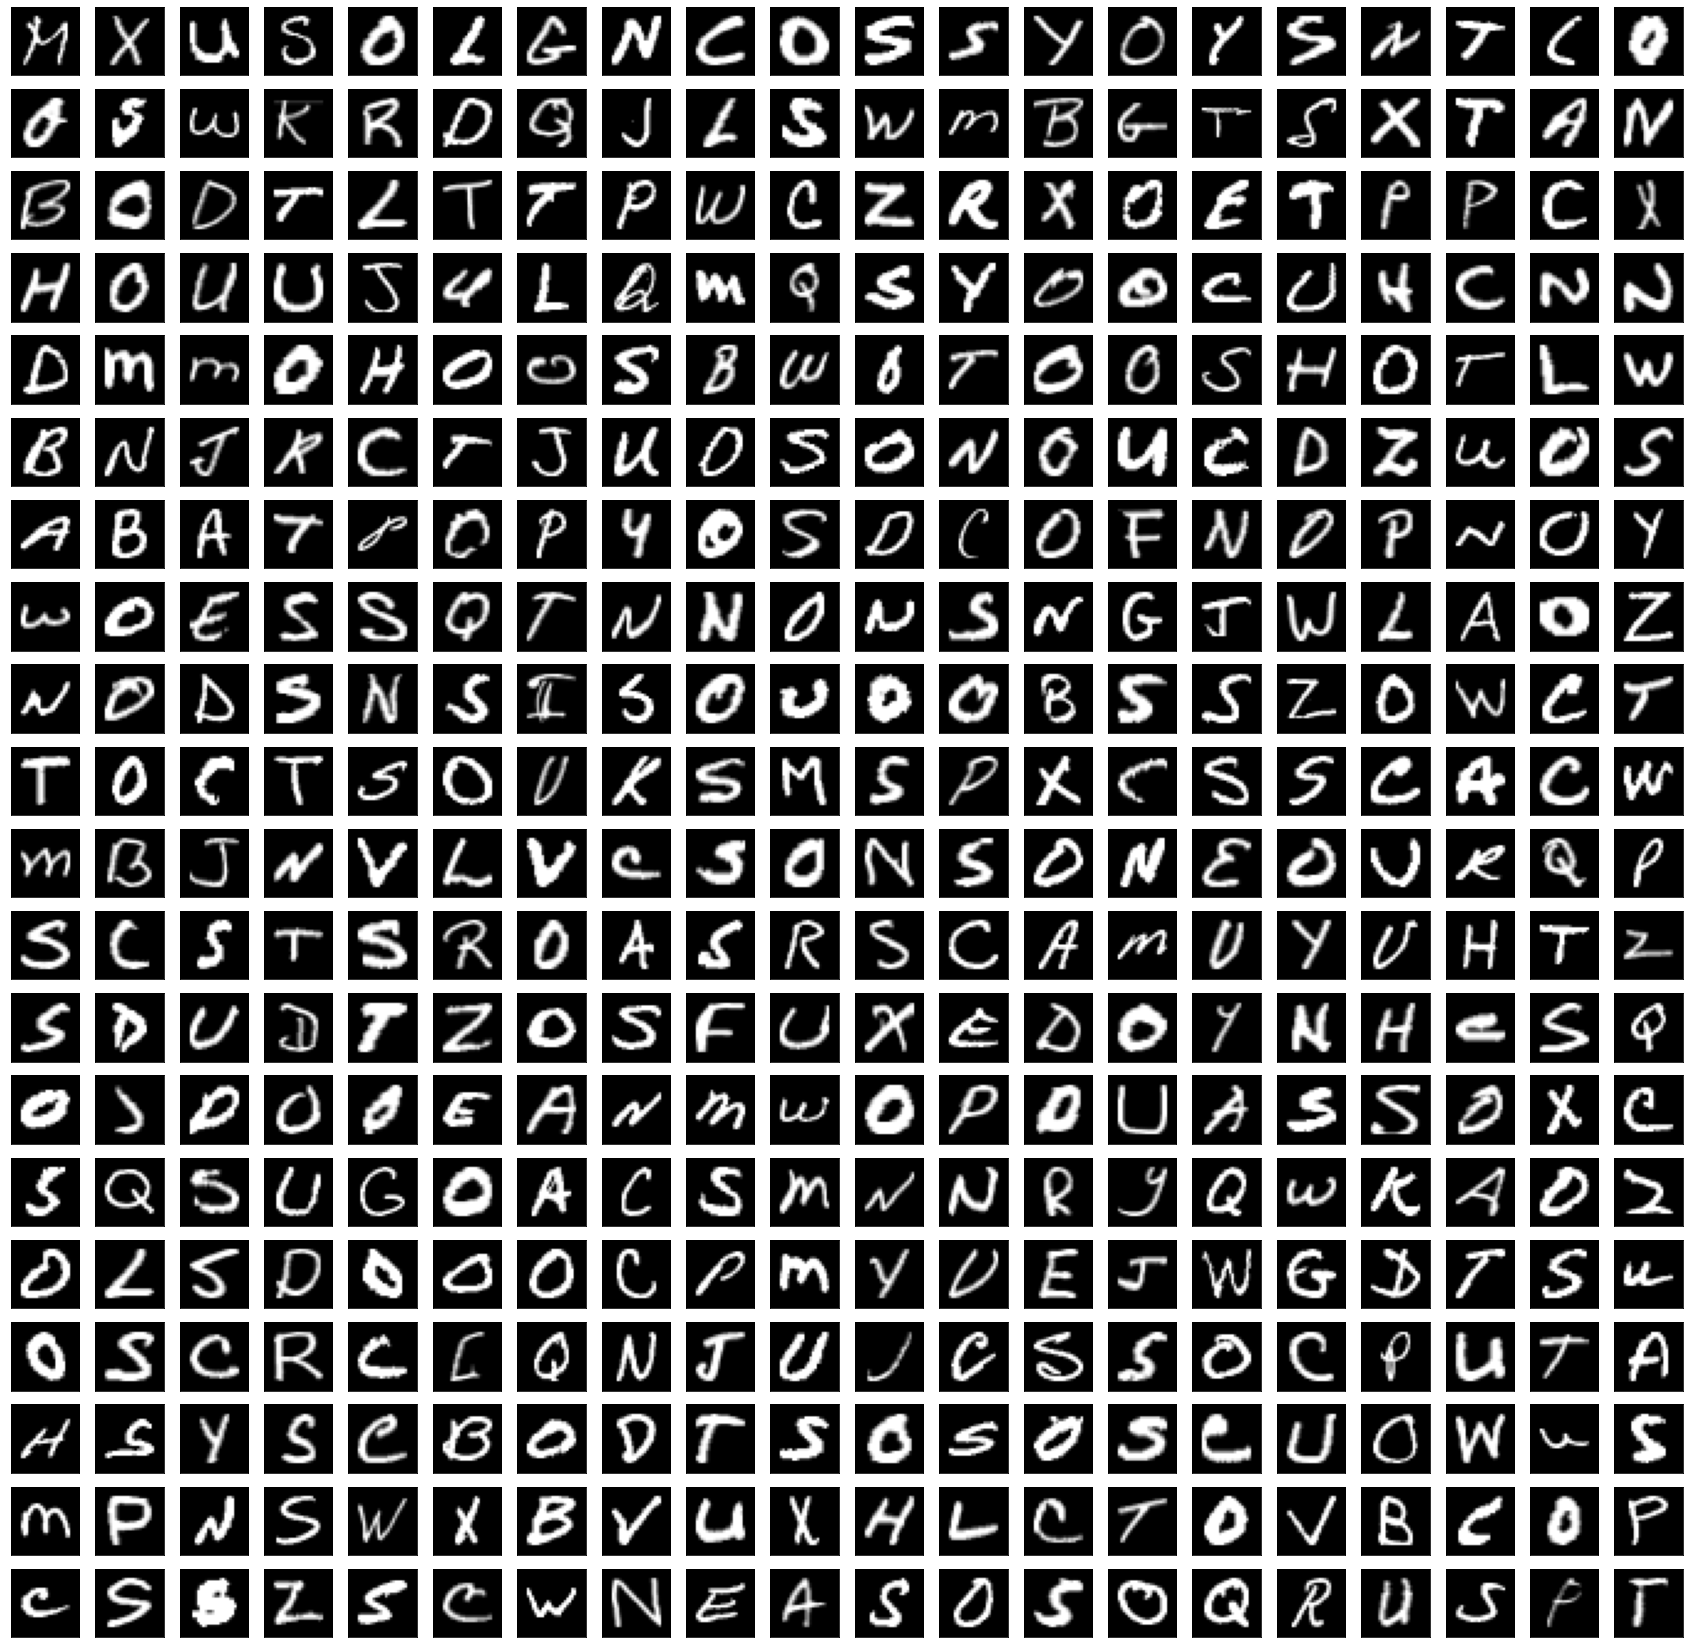

In [9]:
a=np.random.randint(low=0,high=372449,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i],cmap='gray')
    c+=1
del a    

In [17]:
del c, list_alpha, counts, unique

# Training and Testing Split

In [11]:
from sklearn.model_selection import train_test_split as tts

In [12]:
x=x.reshape(372450,28,28,1)
x_train,x_test,y_train,y_test = tts(x,labels,test_size=0.01)
del x  # memory issues
del labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(368725, 28, 28, 1)
(3725, 28, 28, 1)
(368725,)
(3725,)


# Model Building

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adadelta
from keras.optimizers import SGD

Using TensorFlow backend.


In [19]:
model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)         

In [20]:
history = model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=5)

Train on 331852 samples, validate on 36873 samples
Epoch 1/5
331852/331852 [==============================] - 537s 2ms/step - loss: 0.1601 - accuracy: 0.9555 - val_loss: 0.0575 - val_accuracy: 0.9835 26s - loss: 0.1639 - a - ETA: 24s - loss: 0.1 - ETA: 22s - loss: 0.1632 - ac - ETA: 20s - loss: 0.1630 - acc
Epoch 2/5
331852/331852 [==============================] - 550s 2ms/step - loss: 0.0653 - accuracy: 0.9822 - val_loss: 0.0479 - val_accuracy: 0.9869
Epoch 3/5
331852/331852 [==============================] - 437s 1ms/step - loss: 0.0506 - accuracy: 0.9862 - val_loss: 0.0379 - val_accuracy: 0.9895
Epoch 4/5
331852/331852 [==============================] - 403s 1ms/step - loss: 0.0413 - accuracy: 0.9884 - val_loss: 0.0357 - val_accuracy: 0.9908
Epoch 5/5
331852/331852 [==============================] - 404s 1ms/step - loss: 0.0346 - accuracy: 0.9902 - val_loss: 0.0307 - val_accuracy: 0.9919


In [21]:
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
accuracy=history.history['accuracy']

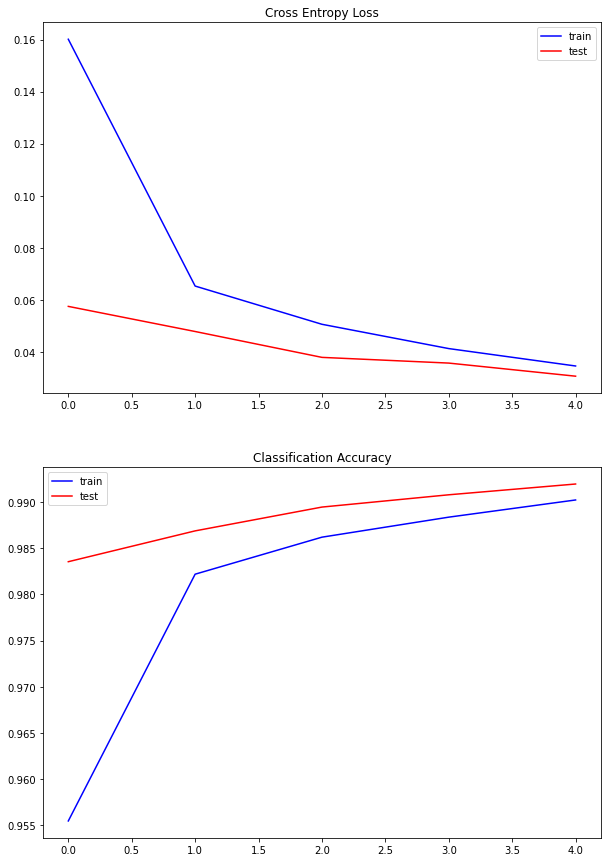

In [22]:
fig=plt.figure(figsize=(10,15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [23]:
metrics=model.evaluate(x_test,y_test)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

3725/3725 [==============================] - 2s 471us/step
Test Acuracy is : 99.44
Test Loss is : 0.02


In [3]:
model=tf.keras.models.load_model('Alphabet_Recognition')

# Evaluating On Test Dataset

In [15]:
def test_images(n=225):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=model.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alpha[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alpha[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

1/1 [==============================] - 0s 50ms/step


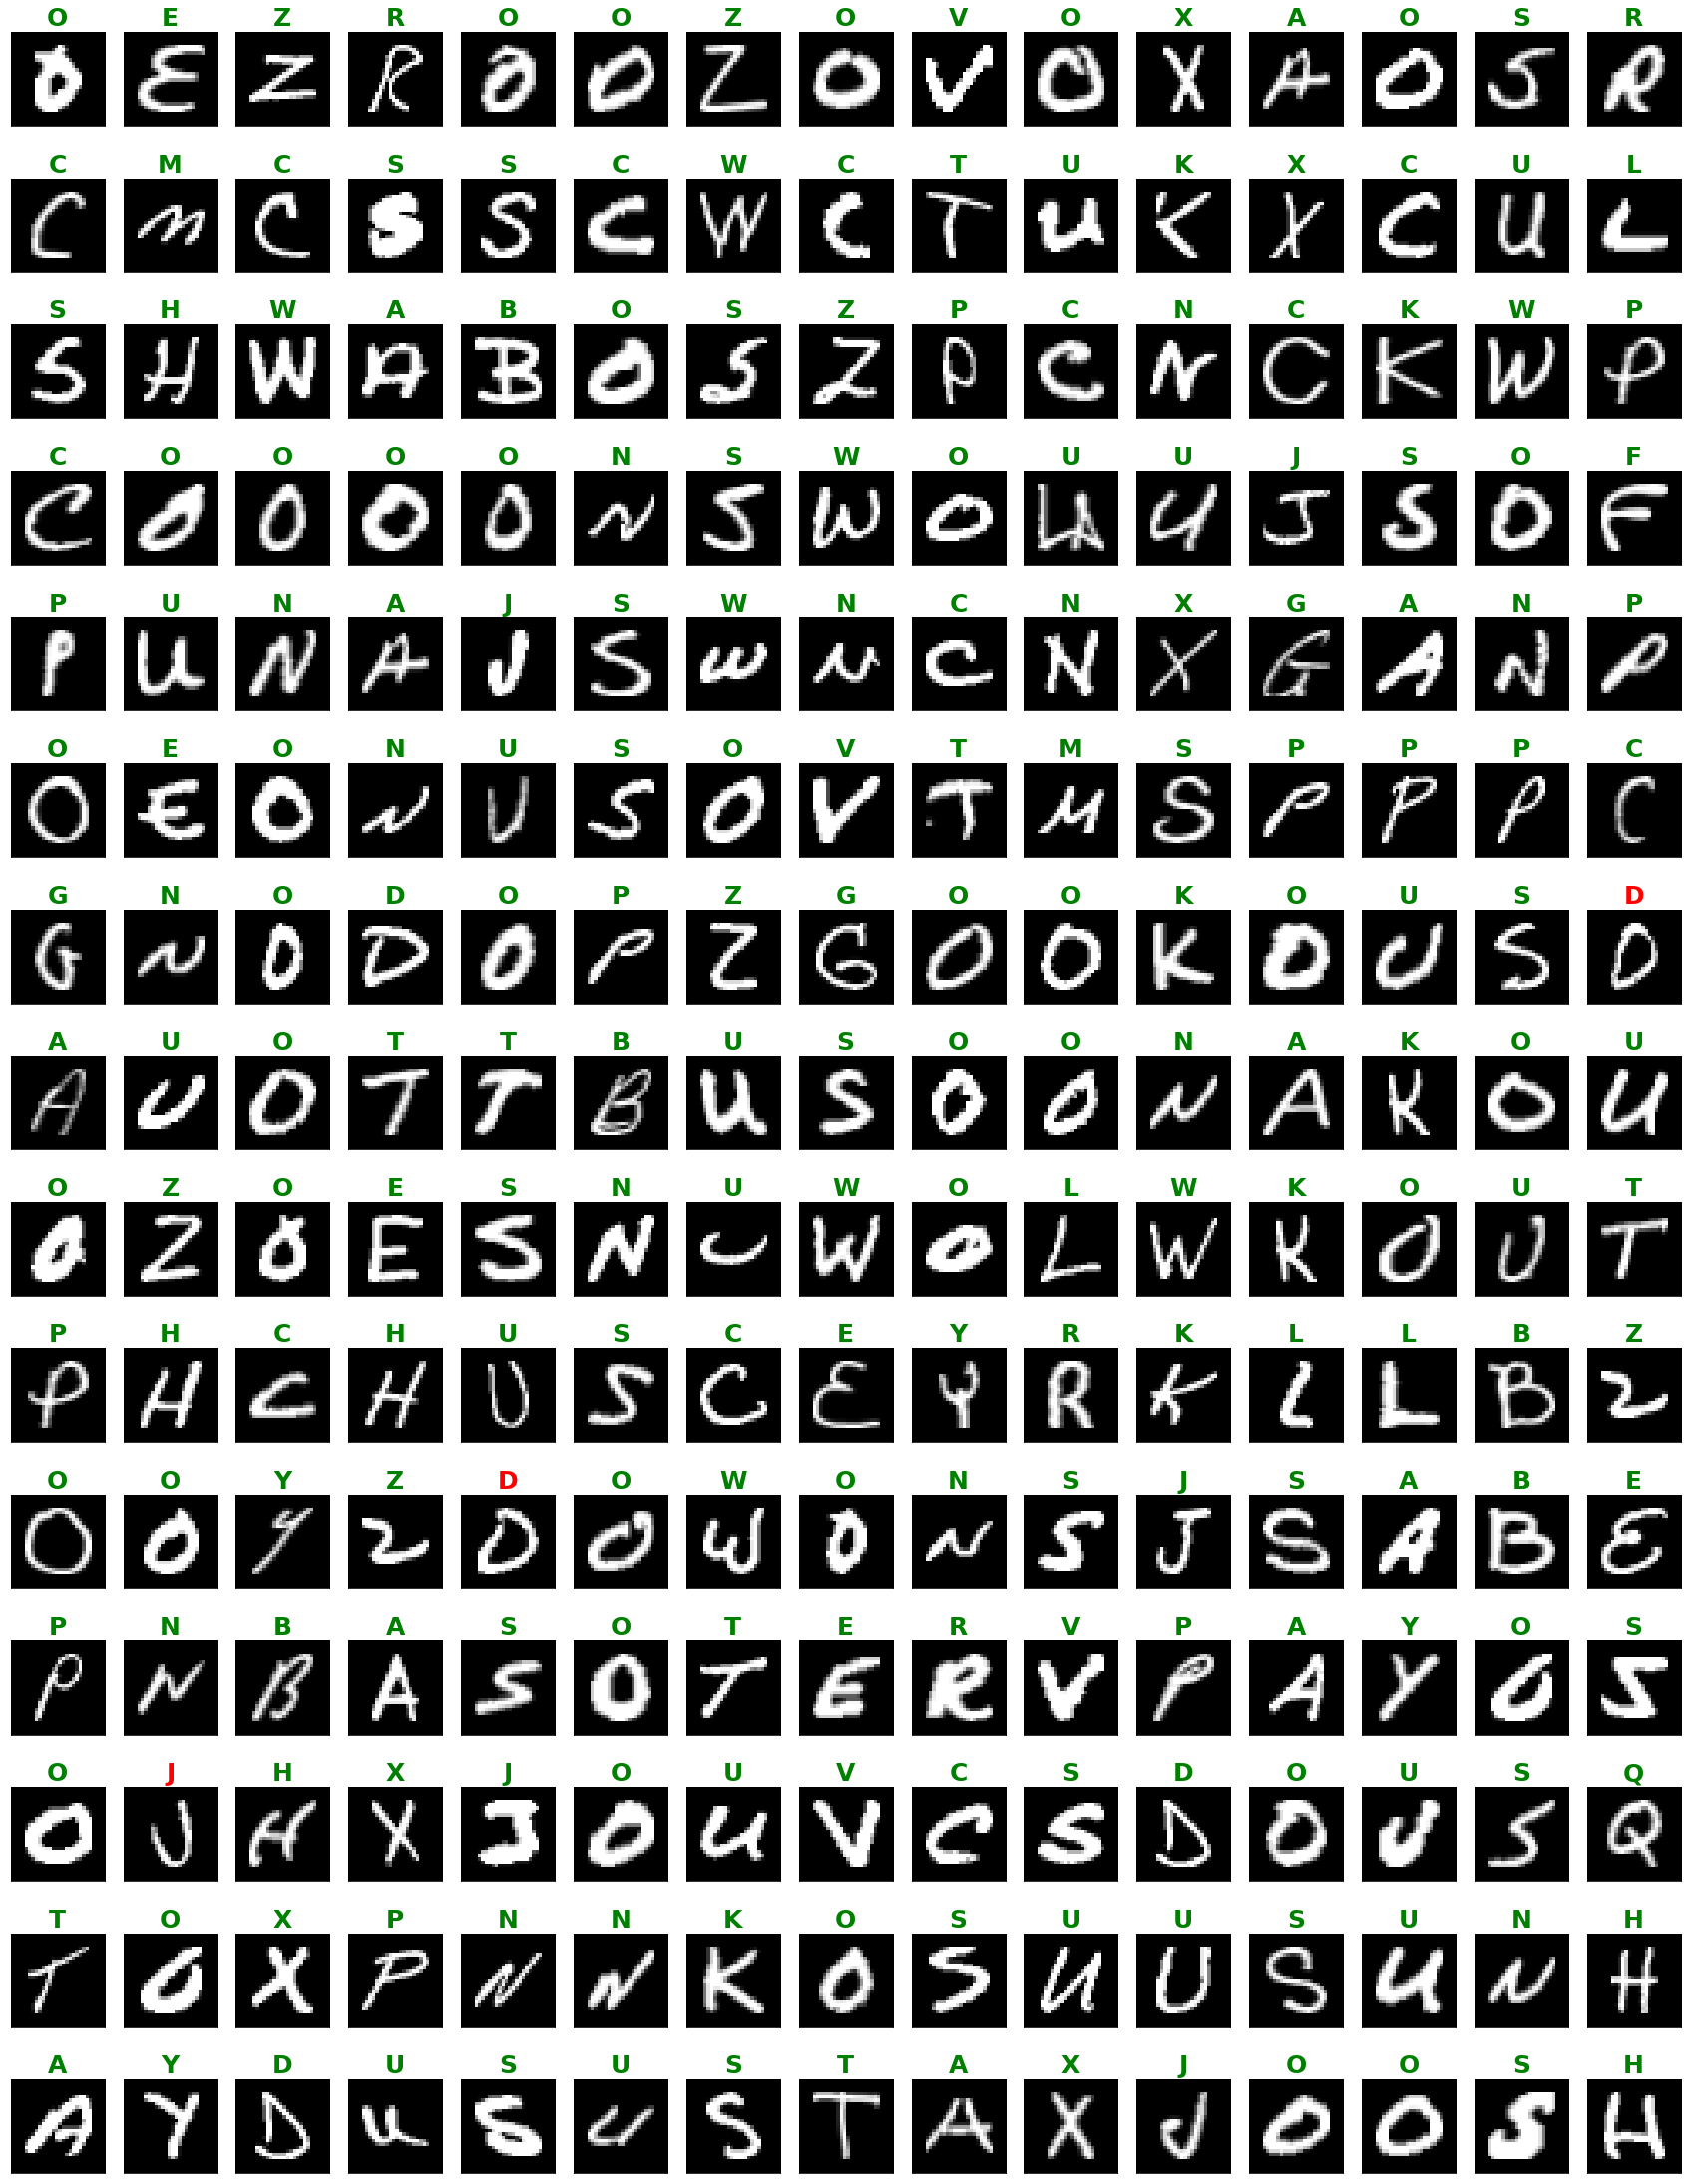

In [16]:
test_images()

# Test your Image

In [4]:
import cv2

In [5]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as ioski
from skimage.color import rgb2gray
from skimage.transform import rotate, resize
import io
import os
from PIL import Image

In [7]:
def thresholding(image,vall,img):
    
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,vall), np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations = 1)
    (contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)
    img2 = img.copy()
    line_list = []

    for ctr in sorted_contours_lines:
        x,y,w,h = cv2.boundingRect(ctr)
        cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
        line_list.append([x, y, x+w, y+h])
    
    return line_list

In [8]:
def alphabet_recognize(filepath):
    image = filepath
    blur_image=cv2.medianBlur(filepath,7)

    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(grey ,150,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((3,5), np.uint8)
    dilated3 = cv2.dilate(thresh, kernel, iterations = 1)
    #plt.imshow(dilated3)
    contours,hierarchy= cv2.findContours(dilated3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    # initialize the reverse flag and sort index
    # handle if we need to sort in reverse
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    if contours and boundingBoxes:
        (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b:b[1][0], reverse=False))

    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
    alphabets=[]
    for digit in preprocessed_digits:
        prediction = model.predict(digit.reshape(1, 28, 28, 1) / 255., verbose=0)
        pred = alpha[np.argmax(prediction)]
        alphabets.append(pred)
    recognized_alphabets = ''.join(alphabets)
    #print(recognized_alphabets)
    return recognized_alphabets
    

In [22]:
def amine(path):    
    image = cv2.imread(path)
    img = cv2.imread(path)
    plt.imshow(image);
    #Line
    text = []
    lines = thresholding(image,200,image)
    for i,y in enumerate(lines):
        trtr = lines[i]
        roi_8=img[trtr[1]:trtr[3], trtr[0]:trtr[2]]
        #Word
        words = thresholding(roi_8,100,roi_8)
        index = len(words) - 1
        for w,u in enumerate(words):
            trtrr = words[index]
            index -= 1
            roi_9=roi_8[trtrr[1]:trtrr[3], trtrr[0]:trtrr[2]]
            word = alphabet_recognize(roi_9)
            #word = word + " "
            text.append(word)
            text.append(" ")
        text.append("/n")
    return text

In [23]:
def my_text(path):
    my_text = amine(path)
    for t in my_text:
        if t == "/n":
            print()
        else:
            print(t, end="")

RACHID AMINE 
MIAAD 


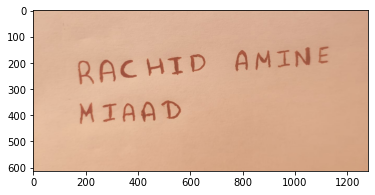

In [126]:
my_text("testimage.jpeg")

BROTHER 


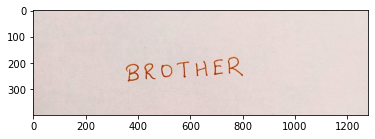

In [11]:
my_text('5.jpg')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


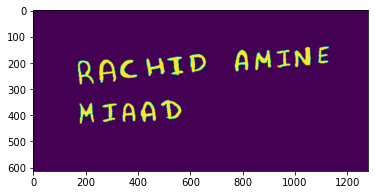

In [12]:
image = cv2.imread('testimage.jpeg')

grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(grey ,110,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((3,5), np.uint8)
dilated3 = cv2.dilate(thresh, kernel, iterations = 1)
print(dilated3)
plt.imshow(dilated3)